In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Airbnb Dataset

In [101]:
df = pd.read_csv("C://Users//yaadw//Downloads//Study//Assignment 4_Data Vizualization using Python Libraries//Airbnb Dataset 19.csv")

In [102]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


### 1.1 Plot showing number of Airbnbs in neighberhood_groups

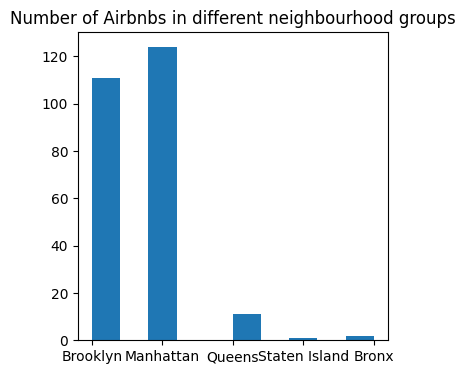

In [103]:
plt.hist(df['neighbourhood_group'])
plt.title('Number of Airbnbs in different neighbourhood groups')
plt.show()

In [119]:
# Filter and sort data based on top rated Airbnbs by reviews per month and total reviews
df_by_reviews_per_month = df.sort_values(by=['reviews_per_month'],ascending=False).head(15)
df_by_number_of_reviews = df.sort_values(by=['number_of_reviews'],ascending=False).head(15)

In [120]:
#make new column named Name_Neighbourhood with the format Nam_of_Airbnb(Neighourhood_group)
df_by_reviews_per_month['Name_Neighbourhood'] = df_by_reviews_per_month['name'] + '(' + df_by_reviews_per_month['neighbourhood_group'] + ')'  
df_by_number_of_reviews['Name_Neighbourhood']= df_by_number_of_reviews['name'] + '(' + df_by_number_of_reviews['neighbourhood_group'] + ')' 

In [121]:
# 1.2.2 Defining a function for adding labels to the bar chart
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]/2,i-0.2,y[i])

#### 1.2: Plots showing top Airbnbs with most reviews per month with pricing

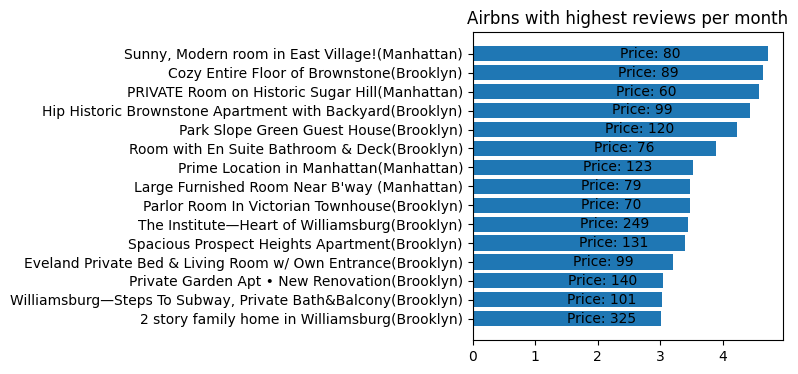

In [123]:
name = list(df_by_reviews_per_month['Name_Neighbourhood'])
reviews_per_month = list(df_by_reviews_per_month['reviews_per_month'])
price = list(df_by_reviews_per_month['price'])
price = ['Price: ' + str(i) for i in price]
name.reverse()
reviews_per_month.reverse()
price.reverse()


plt.barh(y=name,width = reviews_per_month)
plt.title('Airbns with highest reviews per month')
addlabels(reviews_per_month,price)

plt.show()



#### 1.3 Plots showing top Airbnbs with most total reviews with pricing

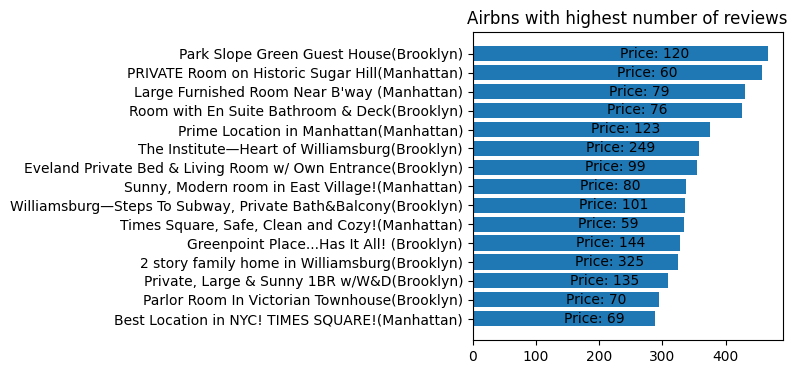

In [108]:
name = list(df_by_number_of_reviews['Name_Neighbourhood'])
number_of_reviews = list(df_by_number_of_reviews['number_of_reviews'])
price = list(df_by_number_of_reviews['price'])
price = ['Price: ' + str(i) for i in price]
name.reverse()
number_of_reviews.reverse()
price.reverse()

plt.barh(y=name,width = number_of_reviews)
plt.title('Airbns with highest number of reviews')
addlabels(number_of_reviews,price)

plt.show()

#### 1.4 Plots showing Airbnbs average price in different neighbourhood groups

In [109]:
# 
df_price = df[['neighbourhood_group','price']].groupby(['neighbourhood_group']).mean(['price'])
df_price[['price']] = round(df_price[['price']],2)
df_price.reset_index(['neighbourhood_group'],inplace=True)
df_price

,neighbourhood_group,price
0,Bronx,42.50
1,Brooklyn,137.46
2,Manhattan,151.85
3,Queens,146.09
4,Staten Island,70.00


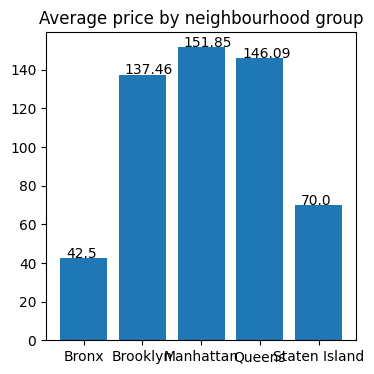

In [110]:
#average price for each neighbourhood_group
group = list(df_price['neighbourhood_group'])
price = list(df_price['price'])
plt.bar(group,price)
plt.title('Average price by neighbourhood group')
#labels
for i in range(len(group)):
    plt.text(i-0.3,price[i]+0.2,price[i])


plt.show()

#### 1.5 Plots showing top Airbnbs on the Map

In [111]:
import plotly.express as px


fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="name")
fig.update_layout(title = 'Airbnb map', title_x=0.5)
fig.show()



## 2. HR Dataset

In [112]:
df2 = pd.read_csv('C://Users//yaadw//Downloads//Study//Assignment 4_Data Vizualization using Python Libraries//HRDataset_v14.csv')
df2.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### 2.1 Box plot showing salary range among different departments

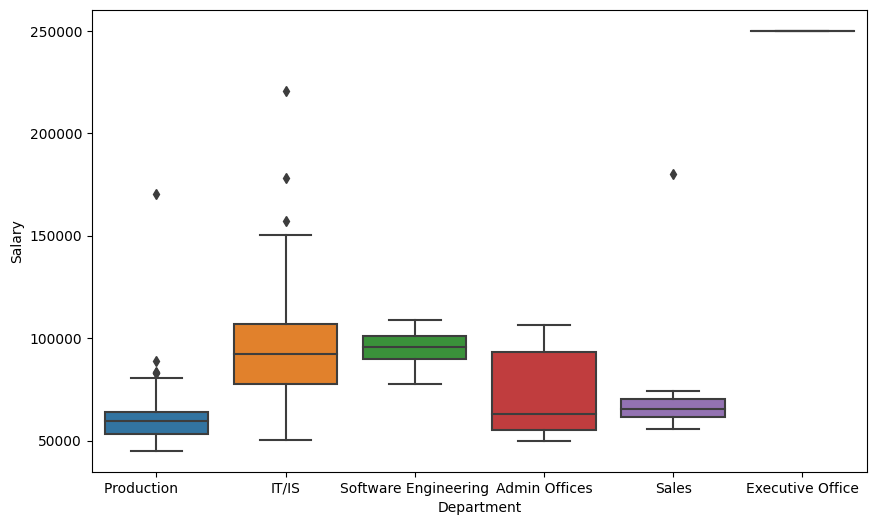

In [113]:
import seaborn as sb

# plotting a vertical box plot with Department and Salary
fig, ax = plt.subplots(figsize=(10, 6))
 
sb.boxplot( x = 'Department',y = 'Salary', data = df2 )
plt.show()

### 2.2 Average Absence by Department

In [114]:
df_absence = round(df2[['Department','Absences']].groupby(['Department']).mean('Absences'),2)
df_absence.reset_index(inplace=True)
df_absence.sort_values(['Absences'],ascending=True,inplace=True)
df_absence

,Department,Absences
0,Admin Offices,8.67
5,Software Engineering,8.73
1,Executive Office,10.00
3,Production,10.14
2,IT/IS,10.44
4,Sales,11.55


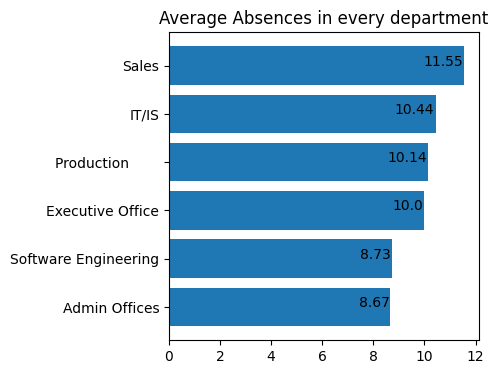

In [115]:
Department = list(df_absence['Department'])
Absences = list(df_absence['Absences'])

plt.rcParams["figure.figsize"] = (4,4)
plt.barh(y = Department,width = Absences)
plt.title('Average Absences in every department')

for i in range(len(Department)):
    if len(str(Absences[i]))==4:
        plt.text(Absences[i]-1.25,i,Absences[i])
        continue
    plt.text(Absences[i]-1.6,i,Absences[i])

plt.show()

### 2.3 Pie chart showing percentage of employees hired from different Recruitment Sources

In [132]:
#data preparation
df_pie = df2.groupby(['RecruitmentSource'])['EmpID'].count()
df_pie = pd.DataFrame(df_pie).reset_index()
df_pie = df_pie.sort_values(['EmpID'],ascending = True)
count = list(df_pie['EmpID'])
source = list(df_pie['RecruitmentSource'])

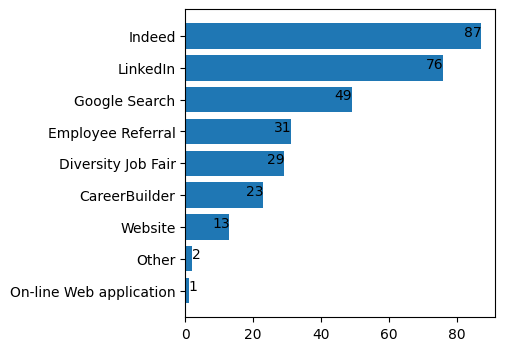

In [134]:
#chart preparation

plt.barh(y = source,width = count)
for i in range(len(source)):
    if source[i] == 'Other' or source[i] == 'On-line Web application':
        plt.text(count[i],i,count[i])
        continue
    plt.text(count[i]-5,i,count[i])

plt.show()

### 2.4 Heatmap showing Department wise count of employees with different performance score

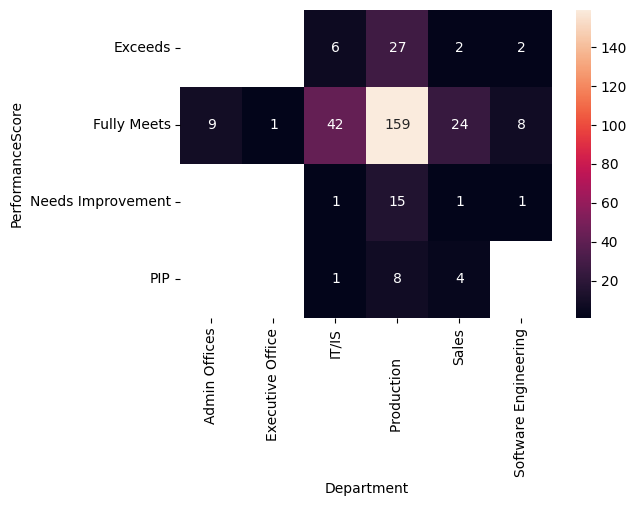

In [146]:
df2[['count']] = 1
plt.rcParams["figure.figsize"] = (6,4)
df_heatmap = df2.pivot_table(values= 'count',index='PerformanceScore',columns='Department',aggfunc=np.sum)
sb.heatmap(df_heatmap,annot=True,fmt='g')
plt.show()